In [1]:
# set up dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# read in google play store csv data
GplayStore_csv_path = "Resources/Google-Playstore-Full.csv"

df = pd.read_csv(GplayStore_csv_path)
df

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone,27-Jul-18,5.0 and up,1.0.4.228,NaN,NaN,NaN,NaN
267048,Pet ads: Buy & Sell,BUSINESS,2.6,5,500+,8.4M,0,Everyone,22-Oct-18,4.0.3 and up,1.8,NaN,NaN,NaN,NaN
267049,Collectors Market: Buy & Sell,BUSINESS,3.28571,7,"1,000+",7.9M,0,Everyone,13-Mar-19,4.0.3 and up,2.4,NaN,NaN,NaN,NaN
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone,27-Aug-18,4.0.3 and up,1.7,NaN,NaN,NaN,NaN


In [2]:
df.count()

App Name           267051
Category           267051
Rating             267052
Reviews            267051
Installs           267052
Size               267052
Price              267052
Content Rating     267052
Last Updated       267052
Minimum Version    267051
Latest Version     267049
Unnamed: 11            18
Unnamed: 12             3
Unnamed: 13             2
Unnamed: 14             1
dtype: int64

In [3]:
df["Category"].value_counts(100)

EDUCATION                          0.125047
TOOLS                              0.080853
BOOKS_AND_REFERENCE                0.080048
ENTERTAINMENT                      0.077154
MUSIC_AND_AUDIO                    0.066939
                                     ...   
 T�rk Alfabesi                     0.000004
 Breaking News                     0.000004
 Podcasts                          0.000004
 Romantic Song Music Love Songs    0.000004
Gate ALARM                         0.000004
Name: Category, Length: 67, dtype: float64

In [4]:
#simple_df = df.loc[df["Category"] == "GAME_ACTION"]
simple_df = df[(df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ADVENTURE") | (df['Category'] == "GAME_ARCADE") | (df['Category'] == "GAME_BOARD") | (df['Category'] == "GAME_CARD") | (df['Category'] == "GAME_CASINO") | (df['Category'] == "GAME_CASUAL") | (df['Category'] == "GAME_EDUCATIONAL") | (df['Category'] == "GAME_MUSIC") | (df['Category'] == "GAME_PUZZLE") | (df['Category'] == "GAME_RACING") | (df['Category'] == "GAME_ROLE_PLAYING") | (df['Category'] == "GAME_SIMULATION") | (df['Category'] == "GAME_SPORTS") | (df['Category'] == "GAME_STRATEGY") | (df['Category'] == "GAME_TRIVIA") | (df['Category'] == "GAME_WORD")]
simple_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME_ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME_CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME_ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME_PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME_ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [5]:
split_simple_df = simple_df['Category'].str.split('_', n=1,expand=True).rename(columns ={0:'Category', 1:'Sub Category'})
split_simple_df

,Category,Sub Category
46,GAME,ACTION
47,GAME,CASUAL
48,GAME,ROLE_PLAYING
49,GAME,PUZZLE
50,GAME,ROLE_PLAYING
...,...,...
266973,GAME,WORD
266995,GAME,ADVENTURE
267014,GAME,SIMULATION
267024,GAME,ARCADE


In [6]:
simple_df[['Category', 'Sub Category']] = simple_df['Category'].str.split('_', n=1,expand=True)
simple_df

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Sub Category
46,King of Crabs,GAME,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN,ACTION
47,Match 3 App Rewards: Daily Game Rewards,GAME,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN,CASUAL
48,Brown Dust,GAME,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN,ROLE_PLAYING
49,Poly - Coloring Puzzle Art Book,GAME,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN,PUZZLE
50,Legend of Empress,GAME,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN,ROLE_PLAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,4.5,8,"1,000+",4.3M,0,Everyone,14-Sep-18,4.0 and up,1.1.1,NaN,NaN,NaN,NaN,WORD
266995,Head 'n' Trails : Finger dodge,GAME,4.35294,34,500+,Varies with device,0,Everyone,3-Jun-17,Varies with device,Varies with device,NaN,NaN,NaN,NaN,ADVENTURE
267014,3D Earth Airplane Flying,GAME,3.21429,14,"1,000+",66M,0,Everyone,16-Jan-18,7.0 and up,1.0.7,NaN,NaN,NaN,NaN,SIMULATION
267024,Bricks Breakout,GAME,4.4,5,100+,2.4M,0,Everyone,2-Nov-16,3.2 and up,1.1,NaN,NaN,NaN,NaN,ARCADE


In [7]:
NewOrder = ['App Name', 'Category', 'Sub Category','Rating','Reviews','Installs','Size','Price','Content Rating','Last Updated','Minimum Version','Latest Version','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14']

In [8]:
simple_df = simple_df[NewOrder]
simple_df.head(5)

,App Name,Category,Sub Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [9]:
simple_df_update = simple_df.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Size', 'Minimum Version', 'Latest Version'], axis=1)
simple_df_update.head()

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19


In [10]:
simple_df_update.to_csv('sample.csv')

In [11]:
simple_df_update.dtypes

App Name          object
Category          object
Sub Category      object
Rating            object
Reviews           object
Installs          object
Price             object
Content Rating    object
Last Updated      object
dtype: object

In [12]:
simple_df_update['Price'] = simple_df_update['Price'].str.replace('$', '')
simple_df_update['Rating'] = simple_df_update['Rating'].astype(str)

simple_df_update

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,WORD,4.5,8,"1,000+",0,Everyone,14-Sep-18
266995,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941036,34,500+,0,Everyone,3-Jun-17
267014,3D Earth Airplane Flying,GAME,SIMULATION,3.214285612,14,"1,000+",0,Everyone,16-Jan-18
267024,Bricks Breakout,GAME,ARCADE,4.400000095,5,100+,0,Everyone,2-Nov-16


In [13]:
simple_df_update.to_csv('Resources/sample.csv', index = False)

In [14]:
new_csv = "Resources/sample.csv"

game_df = pd.read_csv(new_csv)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
0,King of Crabs,GAME,ACTION,3.280255,785.0,"500,000+",0.0,Everyone 10+,7-Mar-19
1,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161,248.0,"10,000+",0.0,Everyone,20-Feb-19
2,Brown Dust,GAME,ROLE_PLAYING,4.476288,70260.0,"1,000,000+",0.0,Teen,1-Apr-19
3,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865,878.0,"10,000+",0.0,Everyone,28-Mar-19
4,Legend of Empress,GAME,ROLE_PLAYING,3.820000,750.0,"50,000+",0.0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
22503,WordDeck,GAME,WORD,4.500000,8.0,"1,000+",0.0,Everyone,14-Sep-18
22504,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941,34.0,500+,0.0,Everyone,3-Jun-17
22505,3D Earth Airplane Flying,GAME,SIMULATION,3.214286,14.0,"1,000+",0.0,Everyone,16-Jan-18
22506,Bricks Breakout,GAME,ARCADE,4.400000,5.0,100+,0.0,Everyone,2-Nov-16


In [15]:
simple_df_update['Price'].value_counts()

0        19586
0.99       610
2.99       512
1.99       494
4.99       390
         ...  
1.70         1
3.89         1
2.29         1
5.72         1
1.61         1
Name: Price, Length: 105, dtype: int64

## Price vs Rating

In [16]:
#Identify Outlier
outlier_game_df = game_df.loc[game_df['Price']>= 100]
outlier_game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
630,Plasma duct - Premium Game,GAME,PUZZLE,3.378378,74.0,"1,000+",399.99,Everyone,4-Mar-19


In [17]:
game_df = game_df.loc[game_df['Price'] <= 100]
#dropped $400 app price as an outlier

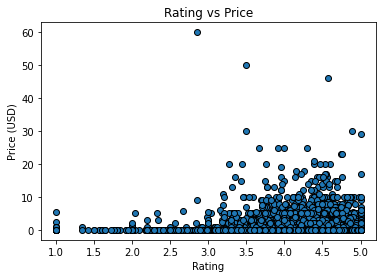

In [18]:
plt.scatter(game_df['Rating'], game_df['Price'], edgecolor = 'k')
plt.xlabel("Rating")
plt.ylabel("Price (USD)")
plt.title("Rating vs Price")

# Save the figure
plt.savefig("Resources/Price vs Rating_Scatter.png")

plt.show()


In [19]:
#####game_df.plot.scatter(x = 'Rating', y = 'Price', edgecolor = 'k')

The r-value is: 0.026622154159874716


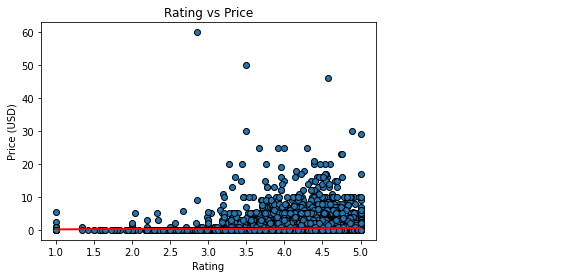

In [20]:
#Is there a correlation between game price and rating?

x_values = game_df['Rating']
y_values = game_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.title("Rating vs Price")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Rating_Linregress.png")

plt.show()

In [21]:
rating = game_df.iloc[:, 3]
price = game_df.iloc[:,6]
correlation = st.pearsonr(rating, price)
print (f'The correlation between both factors is {round(correlation[0],2)}')

The correlation between both factors is 0.03


## Installs and Game Price

In [22]:
game_df['Installs'] = game_df['Installs'].str.replace('+', '')
game_df['Installs'] = game_df['Installs'].str.replace(',', '')
#game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
game_df['Installs'].value_counts()

100000        3587
1000000       3372
10000         3068
1000          2342
500000        1632
50000         1399
100           1380
5000          1247
10000000      1241
5000000       1099
500            813
10             513
50             404
50000000       178
100000000       90
5               78
1               52
500000000        6
0                5
1000000000       1
Name: Installs, dtype: int64

In [24]:
game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
game_df = game_df.sort_values(by = ['Installs'], ascending = True)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
18331,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
8052,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
6052,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
15231,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
14698,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
...,...,...,...,...,...,...,...,...,...
566,Temple Run 2,GAME,ACTION,4.329189,8612822.0,500000000,0.0,Everyone,27-Mar-19
403,Pou,GAME,CASUAL,4.330340,10752323.0,500000000,0.0,Everyone,25-May-18
949,Hill Climb Racing,GAME,RACING,4.440125,9257863.0,500000000,0.0,Everyone,19-Mar-19
658,My Talking Tom,GAME,CASUAL,4.491666,15569249.0,500000000,0.0,Everyone,2-Apr-19


In [26]:
game_df['Installs'] = game_df['Installs'].astype(str)

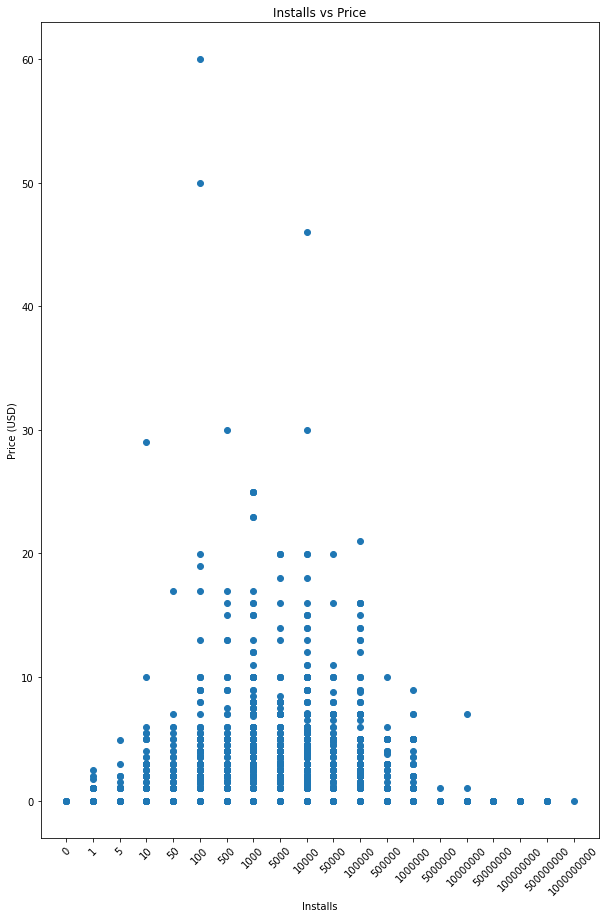

In [27]:
plt.figure(figsize = (10,15))
plt.scatter(game_df['Installs'], game_df['Price'])
plt.xlabel("Installs")
plt.ylabel("Price (USD)")
plt.title("Installs vs Price")
plt.xticks(rotation=45) 

# Save the figure
plt.savefig("Resources/Price vs Installs_Scatter.png")

plt.show()

In [28]:
game_df['Installs'] = game_df['Installs'].astype(int)

In [29]:
#dropping outliers for linear regression
game_outliers = game_df.loc[game_df['Installs'] >= 400000000]
game_outliers
#top 6 games with the most installs

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
285,Candy Crush Saga,GAME,CASUAL,4.450046,24657922.0,500000000,0.0,Everyone,22-Mar-19
245,Clash of Clans,GAME,STRATEGY,4.606215,48401470.0,500000000,0.0,Everyone 10+,2-Apr-19
566,Temple Run 2,GAME,ACTION,4.329189,8612822.0,500000000,0.0,Everyone,27-Mar-19
403,Pou,GAME,CASUAL,4.330340,10752323.0,500000000,0.0,Everyone,25-May-18
949,Hill Climb Racing,GAME,RACING,4.440125,9257863.0,500000000,0.0,Everyone,19-Mar-19
658,My Talking Tom,GAME,CASUAL,4.491666,15569249.0,500000000,0.0,Everyone,2-Apr-19
156,Subway Surfers,GAME,ARCADE,4.498131,29834812.0,1000000000,0.0,Everyone 10+,7-Mar-19


In [30]:
game_df['Installs'] = game_df['Installs'].astype(int)

In [31]:
game_installs = game_df.loc[game_df['Installs'] <= 400000000]

In [32]:
game_installs['Installs'] = game_installs['Installs'].astype(str)
game_installs

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
18331,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
8052,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
6052,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
15231,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
14698,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
...,...,...,...,...,...,...,...,...,...
662,Banana Kong,GAME,ACTION,4.445520,3795174.0,100000000,0.0,Everyone,7-Feb-18
725,Plants vs. Zombies FREE,GAME,STRATEGY,4.444897,4354847.0,100000000,0.0,Everyone 10+,6-Sep-18
191,Vector,GAME,ARCADE,4.382262,3132216.0,100000000,0.0,Everyone 10+,18-Jul-16
657,Hay Day,GAME,CASUAL,4.484343,10603980.0,100000000,0.0,Everyone,10-Dec-18


In [33]:
game_installs['Price'].value_counts()

0.00     19579
0.99       610
2.99       512
1.99       494
4.99       390
         ...  
1.70         1
2.77         1
1.09         1
28.99        1
3.22         1
Name: Price, Length: 104, dtype: int64

The r-value is: -0.0494645997632744


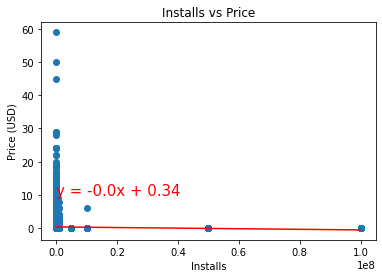

In [34]:
x_values = game_installs['Installs'].astype('int64')
y_values = game_installs['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Installs')
plt.ylabel('Price (USD)')
plt.title("Installs vs Price")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Linregress.png")

plt.show()

## Since there is an obvious correlation between the amount of installs and free gaming apps, let's take a look at just the paid gaming apps and the correlation between the installs as the price increases

In [35]:
game_df['Price'] = game_df['Price'].astype(float)

In [36]:
free_games_df = game_df.loc[(game_df["Price"]!= 0.00) & (game_df['Price']!= 0) & (game_df['Price']!= 0.0)]

free_games_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
20636,Wizard Boy,GAME,ARCADE,5.000000,1.0,1,0.99,Everyone,2-Jun-13
21614,Number Nerd Pro - Pi e primes,GAME,PUZZLE,5.000000,1.0,1,1.77,Everyone,28-Dec-16
17781,Matchmatics - The Matchstick Math Kids Puzzle ...,GAME,EDUCATIONAL,5.000000,1.0,1,1.99,Everyone,6-Jan-18
1431,Spell & Play: Music,GAME,EDUCATIONAL,5.000000,1.0,1,0.99,Everyone,24-Mar-19
1416,Spell & Play: Fish Friends,GAME,EDUCATIONAL,5.000000,2.0,1,0.99,Everyone,24-Mar-19
...,...,...,...,...,...,...,...,...,...
6842,Coin Princess VIP: Retro RPG Quest,GAME,ROLE_PLAYING,4.560093,29138.0,1000000,0.99,Everyone 10+,19-Mar-19
8417,Infinity Dungeon VIP: RPG Adventure,GAME,ROLE_PLAYING,4.350338,26326.0,1000000,0.99,Everyone 10+,19-Mar-19
571,Stickman Legends: Shadow War Offline Fighting ...,GAME,ACTION,4.583939,145755.0,5000000,0.99,Everyone 10+,29-Mar-19
299,Hitman Sniper,GAME,ACTION,4.587015,653815.0,10000000,0.99,Mature 17+,8-Mar-19


In [37]:
free_games_df['Price'].value_counts()

0.99     610
2.99     512
1.99     494
4.99     390
3.99     218
        ... 
1.13       1
18.99      1
2.57       1
2.20       1
4.56       1
Name: Price, Length: 103, dtype: int64

The r-value is: -0.01944432532034141


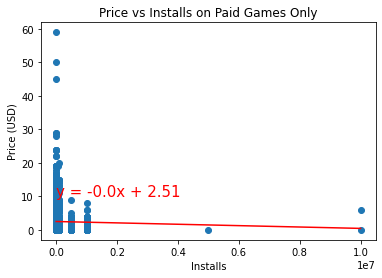

In [38]:
x_values = free_games_df['Installs'].astype('int64')
y_values = free_games_df['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Installs')
plt.ylabel('Price (USD)')
plt.title("Price vs Installs on Paid Games Only")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Paid Games_Linregress.png")

plt.show()

## and to make the correlation even more apparent

In [39]:
lessthan_twenty = game_df.loc[game_df['Price'] >= 20.00]

The r-value is: -0.24467487161403834


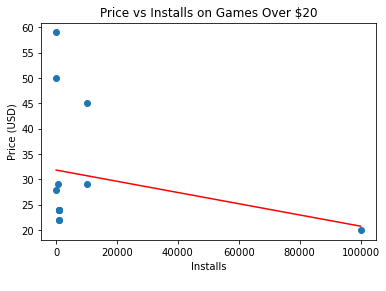

In [40]:
x_values = lessthan_twenty['Installs'].astype('int64')
y_values = lessthan_twenty['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Installs')
plt.ylabel('Price (USD)')
plt.title("Price vs Installs on Games Over $20")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Installs_Games Over $20_Linregress.png")

plt.show()

## Average reviews per category

In [41]:
action_reviews = free_games_df[free_games_df["Sub Category"]=="ACTION"][["Reviews"]].mean(0)
print(action_reviews.astype(int).round(0))
adventure_reviews = free_games_df[free_games_df["Sub Category"]=="ADVENTURE"][["Reviews"]].mean(0)
print(adventure_reviews.astype(int).round(0))
arcade_reviews = free_games_df[free_games_df["Sub Category"]=="ARCADE"][["Reviews"]].mean(0)
print(arcade_reviews.astype(int).round(0))
board_reviews = free_games_df[free_games_df["Sub Category"]=="BOARD"][["Reviews"]].mean(0)
print(board_reviews.astype(int).round(0))
card_reviews = free_games_df[free_games_df["Sub Category"]=="CARD"][["Reviews"]].mean(0)
print(card_reviews.astype(int).round(0))
casino_reviews = free_games_df[free_games_df["Sub Category"]=="CASINO"][["Reviews"]].mean(0)
print(casino_reviews.astype(int).round(0))
casual_reviews = free_games_df[free_games_df["Sub Category"]=="CASUAL"][["Reviews"]].mean(0)
print(casual_reviews.astype(int).round(0))
educational_reviews = free_games_df[free_games_df["Sub Category"]=="EDUCATIONAL"][["Reviews"]].mean(0)
print(educational_reviews.astype(int).round(0))
music_reviews = free_games_df[free_games_df["Sub Category"]=="MUSIC"][["Reviews"]].mean(0)
print(music_reviews.astype(int).round(0))
puzzle_reviews = free_games_df[free_games_df["Sub Category"]=="PUZZLE"][["Reviews"]].mean(0)
print(puzzle_reviews.astype(int).round(0))
racing_reviews = free_games_df[free_games_df["Sub Category"]=="RACING"][["Reviews"]].mean(0)
print(racing_reviews.astype(int).round(0))
role_playing_reviews = free_games_df[free_games_df["Sub Category"]=="ROLE_PLAYING"][["Reviews"]].mean(0)
print(role_playing_reviews.astype(int).round(0))
simulation_reviews = free_games_df[free_games_df["Sub Category"]=="SIMULATION"][["Reviews"]].mean(0)
print(simulation_reviews.astype(int).round(0))
sports_reviews = free_games_df[free_games_df["Sub Category"]=="SPORTS"][["Reviews"]].mean(0)
print(sports_reviews.astype(int).round(0))
strategy_reviews = free_games_df[free_games_df["Sub Category"]=="STRATEGY"][["Reviews"]].mean(0)
print(strategy_reviews.astype(int).round(0))
trivia_reviews = free_games_df[free_games_df["Sub Category"]=="TRIVIA"][["Reviews"]].mean(0)
print(trivia_reviews.astype(int).round(0))
word_reviews = free_games_df[free_games_df["Sub Category"]=="WORD"][["Reviews"]].mean(0)
print(word_reviews.astype(int).round(0))

Reviews    15038
dtype: int32
Reviews    3530
dtype: int32
Reviews    17146
dtype: int32
Reviews    1433
dtype: int32
Reviews    5433
dtype: int32
Reviews    150
dtype: int32
Reviews    1734
dtype: int32
Reviews    453
dtype: int32
Reviews    1831
dtype: int32
Reviews    5267
dtype: int32
Reviews    6394
dtype: int32
Reviews    4005
dtype: int32
Reviews    3602
dtype: int32
Reviews    3318
dtype: int32
Reviews    5598
dtype: int32
Reviews    5367
dtype: int32
Reviews    6891
dtype: int32


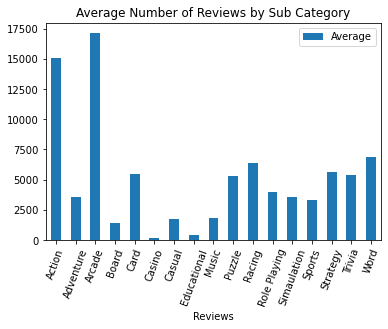

In [43]:
data = {"Reviews":["Action", "Adventure", "Arcade", "Board", "Card", "Casino", "Casual", "Educational", "Music", "Puzzle", "Racing", "Role Playing", "Simaulation", "Sports", "Strategy", "Trivia", "Word"],
        "Average":[15038,3530,17146,1433,5433,150,1734,453,1831,5267,6394,4005,3602,3318,5598,5367,6891]
        };
RdataFrame = pd.DataFrame(data=data);
RdataFrame.plot.bar(x="Reviews", y="Average", rot=70, title="Average Number of Reviews by Sub Category");

# Save the figure
plt.savefig("Resources/Average Number of Reviews by Sub Category.png")
plt.show();

## is there a correlation between the upfront price of the app and the date it was most recently updated

In [44]:
import calendar

In [45]:
date_price = game_df[['Last Updated','Price']]
date_price

,Last Updated,Price
18331,1-Nov-18,0.0
8052,5-Dec-18,0.0
6052,23-Oct-18,0.0
15231,20-Jan-19,0.0
14698,6-Mar-19,0.0
...,...,...
566,27-Mar-19,0.0
403,25-May-18,0.0
949,19-Mar-19,0.0
658,2-Apr-19,0.0


In [46]:
#{month: index for index, month in enumerate(calendar.month_abbr) if month}

In [47]:
split_date_df = date_price['Last Updated'].str.split('-', n=2,expand=True).rename(columns ={0:'Day', 1:'Month', 2: 'Year'})
split_date_df

,Day,Month,Year
18331,1,Nov,18
8052,5,Dec,18
6052,23,Oct,18
15231,20,Jan,19
14698,6,Mar,19
...,...,...,...
566,27,Mar,19
403,25,May,18
949,19,Mar,19
658,2,Apr,19


In [48]:
date_price[['Day', 'Month', 'Year']] = date_price['Last Updated'].str.split('-', n=2,expand=True)
date_price                                                         

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Last Updated,Price,Day,Month,Year
18331,1-Nov-18,0.0,1,Nov,18
8052,5-Dec-18,0.0,5,Dec,18
6052,23-Oct-18,0.0,23,Oct,18
15231,20-Jan-19,0.0,20,Jan,19
14698,6-Mar-19,0.0,6,Mar,19
...,...,...,...,...,...
566,27-Mar-19,0.0,27,Mar,19
403,25-May-18,0.0,25,May,18
949,19-Mar-19,0.0,19,Mar,19
658,2-Apr-19,0.0,2,Apr,19


In [49]:
d = {month: index for index, month in enumerate(calendar.month_abbr) if month}

date_price.Month = date_price.Month.map(d)

date_price

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Last Updated,Price,Day,Month,Year
18331,1-Nov-18,0.0,1,11,18
8052,5-Dec-18,0.0,5,12,18
6052,23-Oct-18,0.0,23,10,18
15231,20-Jan-19,0.0,20,1,19
14698,6-Mar-19,0.0,6,3,19
...,...,...,...,...,...
566,27-Mar-19,0.0,27,3,19
403,25-May-18,0.0,25,5,18
949,19-Mar-19,0.0,19,3,19
658,2-Apr-19,0.0,2,4,19


In [50]:
date_price['year'] = pd.to_numeric(date_price['Year']) +2000
date_price['year'].value_counts()

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2019    8302
2018    7743
2017    2813
2016    1671
2015    1021
2014     628
2013     247
2012      52
2011      23
2010       6
2009       1
Name: year, dtype: int64

In [51]:
#date_price['Year'] = date_price['Year'].astype(str)
#date_price['Month'] = date_price['Month'].astype(str)

In [52]:
date_price['full_date'] = pd.to_datetime(date_price[['year', 'Month', 'Day']])

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
date_price['fd_numeric']=date_price['full_date'].map(dt.datetime.toordinal)

C:\Users\cindy\Anaconda3\envs\PyData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
date_price.sort_values(by = 'full_date')

,Last Updated,Price,Day,Month,Year,year,full_date,fd_numeric
16822,11-Feb-09,0.00,11,2,09,2009,2009-02-11,733449
9488,11-May-10,0.99,11,5,10,2010,2010-05-11,733903
2278,6-Sep-10,0.00,6,9,10,2010,2010-09-06,734021
19534,11-Oct-10,0.00,11,10,10,2010,2010-10-11,734056
2279,2-Dec-10,0.00,2,12,10,2010,2010-12-02,734108
...,...,...,...,...,...,...,...,...
4993,3-Apr-19,0.00,3,4,19,2019,2019-04-03,737152
17820,3-Apr-19,0.00,3,4,19,2019,2019-04-03,737152
5319,3-Apr-19,0.00,3,4,19,2019,2019-04-03,737152
6921,4-Apr-19,0.00,4,4,19,2019,2019-04-04,737153


In [55]:
#tick_one = date_price.loc[(date_price["fd_numeric"] > 737500) & (date_price['fd_numeric'] < 736502)]
#lessthan_twenty = game_df.loc[game_df['Price'] >= 20.00]
#free_games_df = game_df.loc[(game_df["Price"]!= 0.00) & (game_df['Price']!= 0) & (game_df['Price']!= 0.0)]
date_price.tail()

,Last Updated,Price,Day,Month,Year,year,full_date,fd_numeric
566,27-Mar-19,0.0,27,3,19,2019,2019-03-27,737145
403,25-May-18,0.0,25,5,18,2018,2018-05-25,736839
949,19-Mar-19,0.0,19,3,19,2019,2019-03-19,737137
658,2-Apr-19,0.0,2,4,19,2019,2019-04-02,737151
156,7-Mar-19,0.0,7,3,19,2019,2019-03-07,737125


The r-value is: -0.05133958825690186


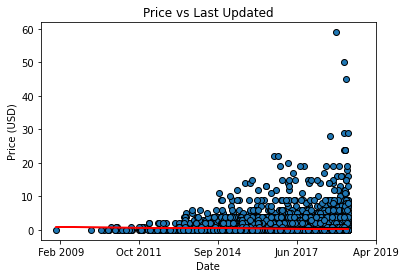

In [57]:
x_values = date_price['fd_numeric']
y_values = date_price['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = 'k')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks([733500, 734500, 735500, 736500, 737500], [' Feb 2009', 'Oct 2011', 'Sep 2014', 'Jun 2017', 'Apr 2019'])
plt.title("Price vs Last Updated")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Resources/Price vs Last Updated_Linregress.png")
plt.show()


In [58]:
installs_rating = game_df[["Installs", "Content Rating"]]
installs_rating

,Installs,Content Rating
18331,0,Everyone
8052,0,Everyone
6052,0,Everyone
15231,0,Everyone
14698,0,Everyone
...,...,...
566,500000000,Everyone
403,500000000,Everyone
949,500000000,Everyone
658,500000000,Everyone


## Average Installs by Rating

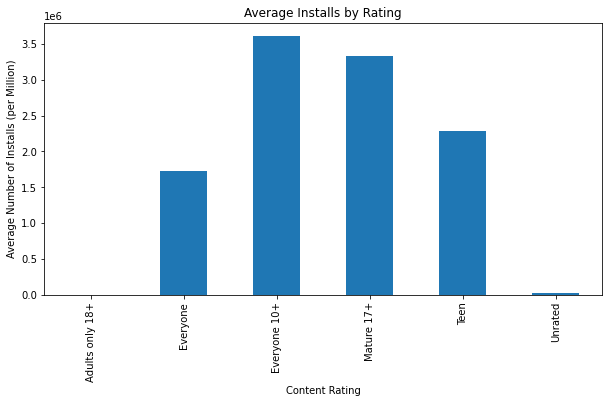

<Figure size 432x288 with 0 Axes>

In [60]:
pandas_bar_points = game_df.groupby(["Content Rating"])["Installs"].mean()
pandas_bar_points.plot(kind = "bar", figsize= (10,5))

#set axis titles
plt.title("Average Installs by Rating")
plt.xlabel("Content Rating")
plt.ylabel("Average Number of Installs (per Million)")

# Save the figure
plt.savefig("Resources/Average Installs by Rating.png")

#display chart 
plt.show()
plt.tight_layout()

## Merging in Apple data for comparison

In [68]:
# read in apple app store csv data
appstore_csv_path = "Resources/appstore_games.csv"

apple_df = pd.read_csv(appstore_csv_path)
apple_df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/7/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/7/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/7/2008,5/9/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [69]:
apple_df_update = apple_df.drop(columns=['URL','ID','Subtitle','Icon URL', 'In-app Purchases', 'Description','Developer','Age Rating','Languages','Size','Primary Genre','Genres','Original Release Date','Current Version Release Date'], axis=1)
apple_df_update.head()

,Name,Average User Rating,User Rating Count,Price
0,Sudoku,4.0,3553.0,2.99
1,Reversi,3.5,284.0,1.99
2,Morocco,3.0,8376.0,0.00
3,Sudoku (Free),3.5,190394.0,0.00
4,Senet Deluxe,3.5,28.0,2.99


In [70]:
combined_game = pd.merge(game_df, apple_df_update, left_on='App Name', right_on='Name')
combined_game

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price_x,Content Rating,Last Updated,Name,Average User Rating,User Rating Count,Price_y
0,Switch Path,GAME,ARCADE,5.000000,1.0,5,0.0,Everyone,26-Nov-18,Switch Path,NaN,NaN,0.0
1,Tic Tac Toe,GAME,PUZZLE,5.000000,3.0,5,0.0,Everyone,18-Jan-19,Tic Tac Toe,NaN,NaN,0.0
2,Tic Tac Toe,GAME,BOARD,4.833333,6.0,10,0.0,Everyone,3-Mar-18,Tic Tac Toe,NaN,NaN,0.0
3,Tic Tac Toe,GAME,BOARD,5.000000,12.0,10,0.0,Everyone,30-Dec-17,Tic Tac Toe,NaN,NaN,0.0
4,Tic Tac Toe,GAME,STRATEGY,5.000000,3.0,50,0.0,Everyone,3-Jul-18,Tic Tac Toe,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Agar.io,GAME,ACTION,4.235499,3899112.0,100000000,0.0,Everyone,26-Mar-19,Agar.io,4.5,257852.0,0.0
877,Mobile Legends: Bang Bang,GAME,ACTION,4.347415,11438205.0,100000000,0.0,Teen,22-Mar-19,Mobile Legends: Bang Bang,4.5,231877.0,0.0
878,Clash Royale,GAME,STRATEGY,4.545474,25449254.0,100000000,0.0,Everyone 10+,13-Feb-19,Clash Royale,4.5,1277095.0,0.0
879,PUBG MOBILE,GAME,ACTION,4.525657,13334346.0,100000000,0.0,Teen,19-Feb-19,PUBG MOBILE,4.5,711409.0,0.0


In [71]:
combined_game = combined_game.drop(columns=['Category','Sub Category','Installs','Content Rating','Last Updated','Name'], axis=1)
combined_game.head()

,App Name,Rating,Reviews,Price_x,Average User Rating,User Rating Count,Price_y
0,Switch Path,5.000000,1.0,0.0,NaN,NaN,0.0
1,Tic Tac Toe,5.000000,3.0,0.0,NaN,NaN,0.0
2,Tic Tac Toe,4.833333,6.0,0.0,NaN,NaN,0.0
3,Tic Tac Toe,5.000000,12.0,0.0,NaN,NaN,0.0
4,Tic Tac Toe,5.000000,3.0,0.0,NaN,NaN,0.0


In [72]:
combined_game = combined_game.rename(columns={'Rating': 'Google Rating', 'Reviews': 'Google Reviews','Price_x':'Google Price','Average User Rating':'Apple Rating','User Rating Count':'Apple Reviews','Price_y':'Apple Price'})
combined_game

,App Name,Google Rating,Google Reviews,Google Price,Apple Rating,Apple Reviews,Apple Price
0,Switch Path,5.000000,1.0,0.0,NaN,NaN,0.0
1,Tic Tac Toe,5.000000,3.0,0.0,NaN,NaN,0.0
2,Tic Tac Toe,4.833333,6.0,0.0,NaN,NaN,0.0
3,Tic Tac Toe,5.000000,12.0,0.0,NaN,NaN,0.0
4,Tic Tac Toe,5.000000,3.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
876,Agar.io,4.235499,3899112.0,0.0,4.5,257852.0,0.0
877,Mobile Legends: Bang Bang,4.347415,11438205.0,0.0,4.5,231877.0,0.0
878,Clash Royale,4.545474,25449254.0,0.0,4.5,1277095.0,0.0
879,PUBG MOBILE,4.525657,13334346.0,0.0,4.5,711409.0,0.0


In [73]:
combined_game_clean = combined_game.dropna()
combined_game_clean

,App Name,Google Rating,Google Reviews,Google Price,Apple Rating,Apple Reviews,Apple Price
17,Cooking Trip,5.000000,1.0,2.99,4.5,7.0,6.99
19,West Game,3.147059,34.0,0.00,4.5,3634.0,0.00
23,Partia 3,5.000000,10.0,6.99,4.5,12.0,6.99
24,Reversi,5.000000,1.0,0.00,3.5,284.0,1.99
25,Reversi,3.142857,7.0,0.00,3.5,284.0,1.99
...,...,...,...,...,...,...,...
876,Agar.io,4.235499,3899112.0,0.00,4.5,257852.0,0.00
877,Mobile Legends: Bang Bang,4.347415,11438205.0,0.00,4.5,231877.0,0.00
878,Clash Royale,4.545474,25449254.0,0.00,4.5,1277095.0,0.00
879,PUBG MOBILE,4.525657,13334346.0,0.00,4.5,711409.0,0.00


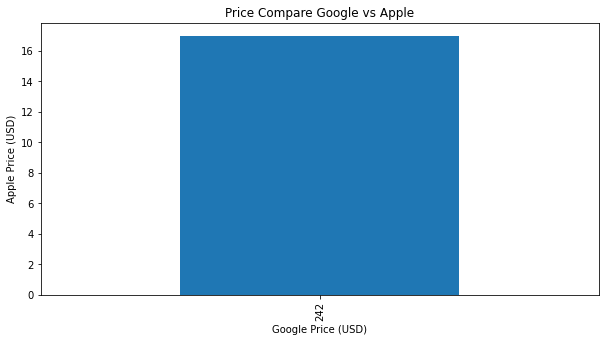

<Figure size 432x288 with 0 Axes>

In [74]:
combined_plot = combined_game_clean.groupby(["Google Price"])["Apple Price"]
combined_plot.plot(kind = "bar", figsize= (10,5))

#set axis titles
plt.title("Price Compare Google vs Apple")
plt.xlabel("Google Price (USD)")
plt.ylabel("Apple Price (USD)")

# Save the figure
plt.savefig("Resources/Google vs Apple.png")

#display chart 
plt.show()
plt.tight_layout()